In [1]:
# Import the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import the file
df=pd.read_csv("CO2 dataset.csv")
list(df)


['Year', 'CO2']

In [2]:
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
994,NaN,NaN
995,NaN,NaN
996,NaN,NaN
997,NaN,NaN


In [3]:
# Check for null values
df.isnull().sum()

Year    784
CO2     784
dtype: int64

In [4]:
# Remove rows with null values
df = df.dropna()

In [5]:
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [7]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


              Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000


In [8]:
# Correlation Analysis:
correlation = df['Year'].corr(df['CO2'])
print("Correlation between Year and CO2 levels:", correlation)


Correlation between Year and CO2 levels: 0.9512429456758801


In [9]:
# Performing Some Calculations

# 1. Average CO2 Level
average_co2 = df['CO2'].mean()
print("Average CO2 Level:", average_co2)

# 2. Maximum and Minimum CO2 Levels
max_co2 = df['CO2'].max()
min_co2 = df['CO2'].min()
print("Maximum CO2 Level:", max_co2)
print("Minimum CO2 Level:", min_co2)

# 3. CO2 Increase Rate
# Calculate the difference in CO2 levels between consecutive years
df['CO2_diff'] = df['CO2'].diff()
# Calculate the average increase rate per year
average_increase_rate = df['CO2_diff'].mean()
print("Average CO2 Increase Rate per Year:", average_increase_rate)

# 4. Year with Maximum CO2 Increase
max_increase_year = df.loc[df['CO2_diff'].idxmax()]['Year']
max_increase_value = df['CO2_diff'].max()
print("Year with Maximum CO2 Increase:", max_increase_year, "(Increase:", max_increase_value, ")")

# 5. Year with Maximum CO2 Decrease
max_decrease_year = df.loc[df['CO2_diff'].idxmin()]['Year']
max_decrease_value = df['CO2_diff'].min()
print("Year with Maximum CO2 Decrease:", max_decrease_year, "(Decrease:", max_decrease_value, ")")


Average CO2 Level: 6.741970186046511
Maximum CO2 Level: 18.2
Minimum CO2 Level: 0.00175
Average CO2 Increase Rate per Year: 0.07053420560747664
Year with Maximum CO2 Increase: 1923.0 (Increase: 2.5 )
Year with Maximum CO2 Decrease: 1931.0 (Decrease: -1.8899999999999988 )


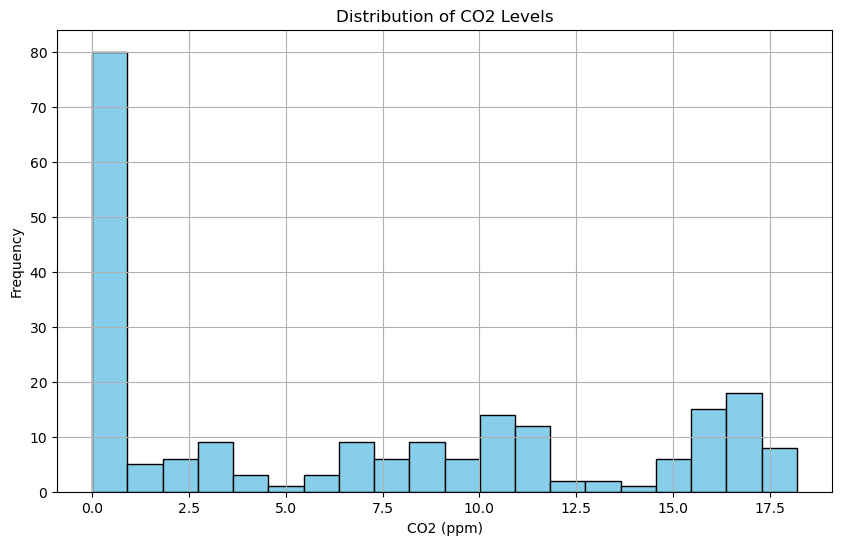

In [10]:
# Distribution of CO2 levels(Histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['CO2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2 (ppm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1400x1000 with 0 Axes>

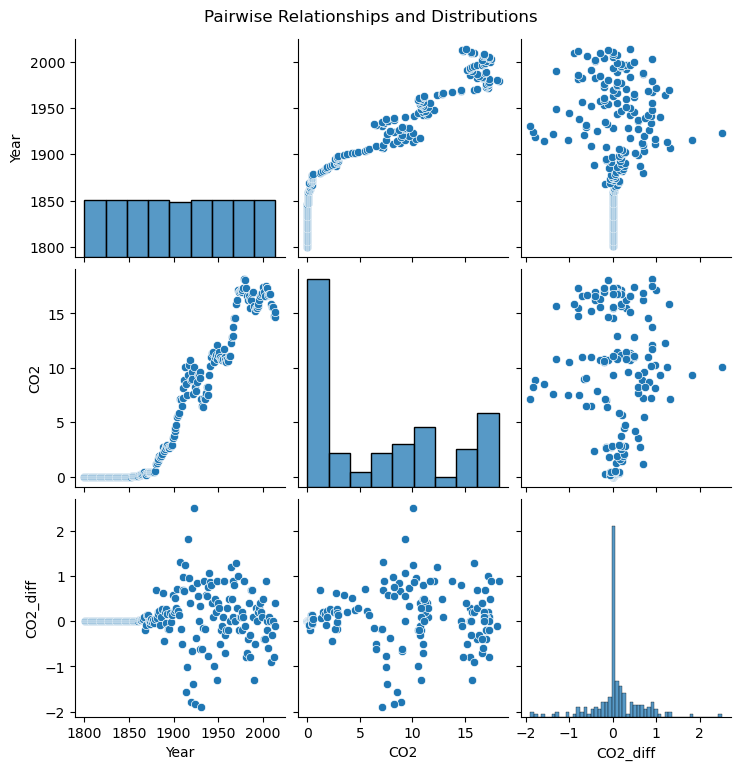

In [11]:
# Pair plot
plt.figure(figsize=(14, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

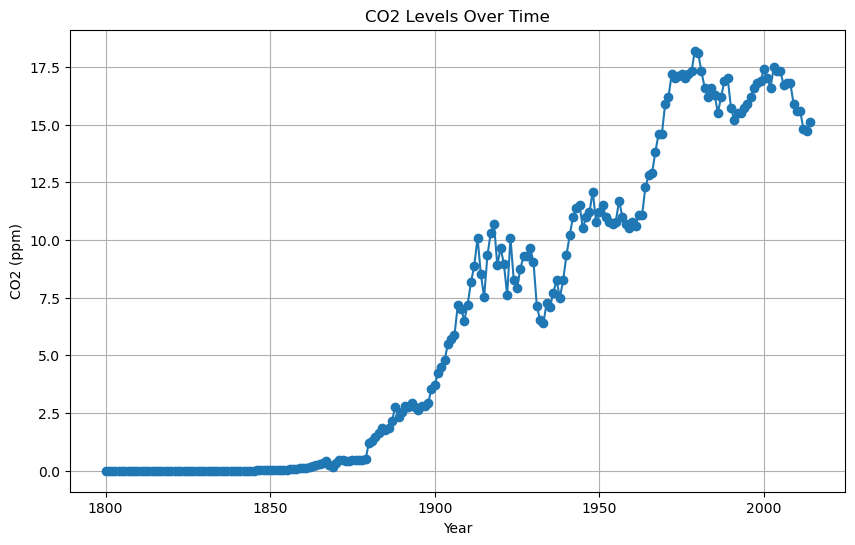

In [12]:
# Line plot showing the CO2 levels over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CO2'], marker='o', linestyle='-')
plt.title('CO2 Levels Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.show()

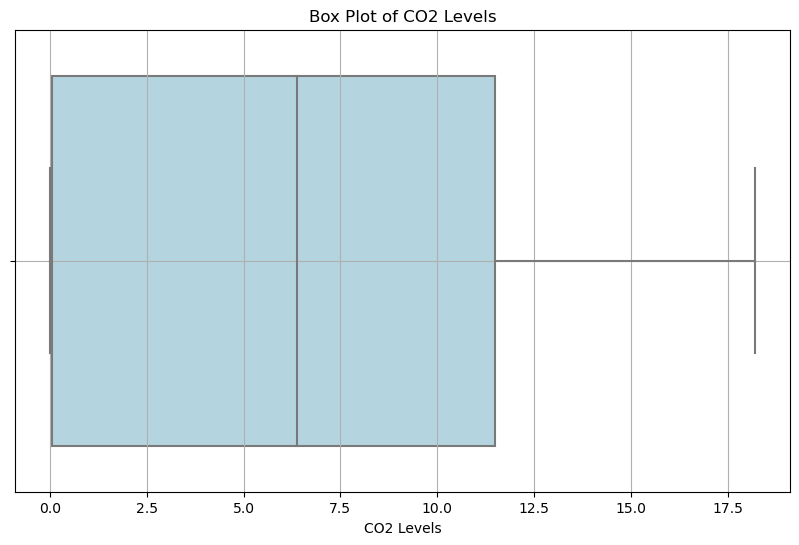

In [13]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CO2', color='lightblue')
plt.title('Box Plot of CO2 Levels')
plt.xlabel('CO2 Levels')
plt.grid(True)
plt.show()


In [14]:
# Detect outliers using Tukey's method
q1 = df['CO2'].quantile(0.25)
q3 = df['CO2'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['CO2'] < lower_bound) | (df['CO2'] > upper_bound)]

print("Number of outliers:", len(outliers))
print("Outliers:")
print(outliers)

Number of outliers: 0
Outliers:
Empty DataFrame
Columns: [Year, CO2, CO2_diff]
Index: []


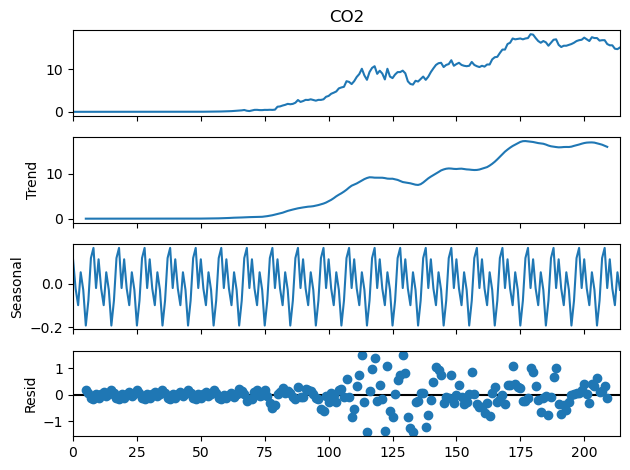

In [15]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition
decomposition = seasonal_decompose(df['CO2'], model='additive', period=10)
decomposition.plot()
plt.show()


<Figure size 1000x600 with 0 Axes>

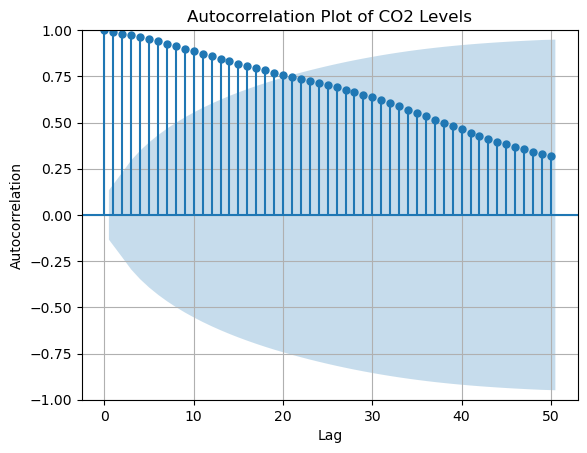

In [16]:
# Autocorrelation Plot:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(df['CO2'], lags=50)
plt.title('Autocorrelation Plot of CO2 Levels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

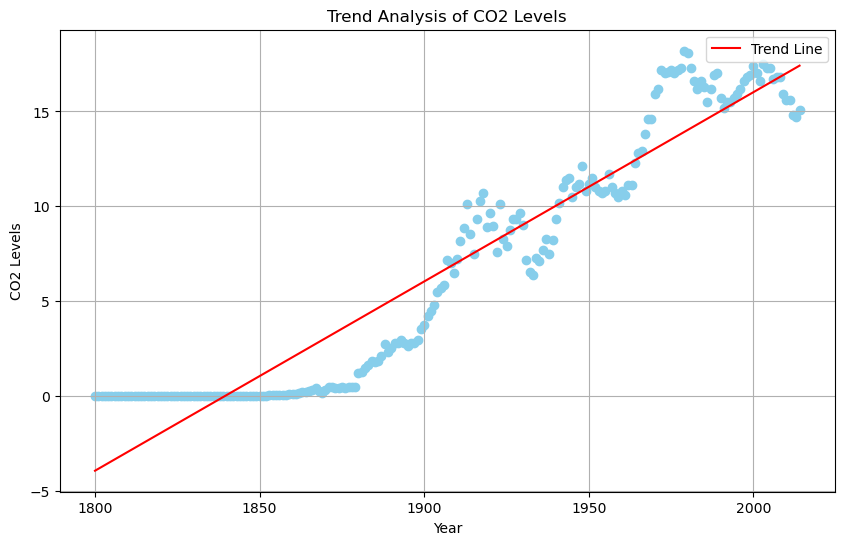

Slope: 0.09973459990581754
Intercept: -183.45191183434756
R-squared: 0.9048631416981253


In [17]:
# Trend Analysis:
from scipy.stats import linregress

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CO2'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CO2'], color='skyblue')
plt.plot(df['Year'], slope * df['Year'] + intercept, color='red', label='Trend Line')
plt.title('Trend Analysis of CO2 Levels')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value ** 2)


In [23]:
# Load the CO2 dataset
df = pd.read_csv("CO2 dataset.csv")

# Remove rows with null values
df = df.dropna()


C:\Users\Srinivas saladi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Srinivas saladi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Srinivas saladi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 0.8235426903038526


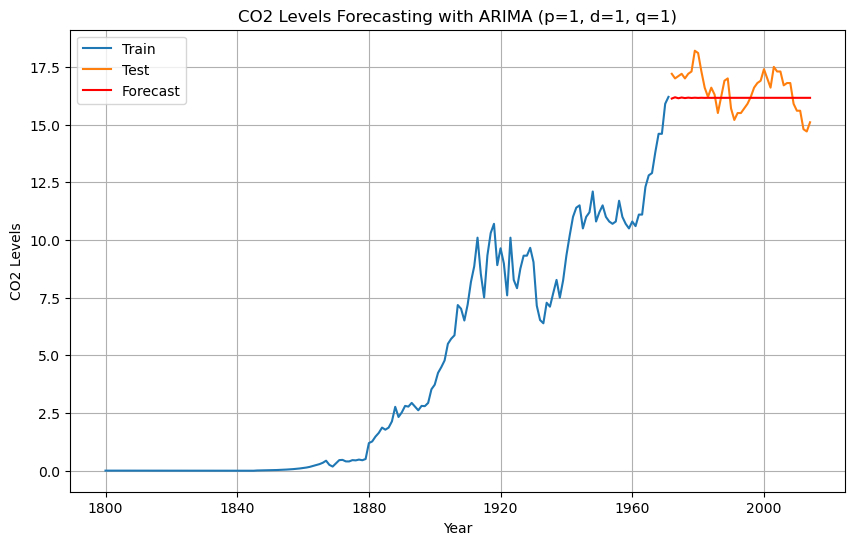

In [24]:
# Time Series Forecasting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Convert 'Year' to datetime format and set it as the index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Define the ARIMA model
# We'll use p=1, d=1, q=1 for simplicity
p, d, q = 1, 1, 1
model = ARIMA(train, order=(p, d, q))

# Fit the ARIMA model
model_fit = model.fit()

# Forecast future CO2 levels
forecast = model_fit.forecast(steps=len(test))

# Evaluate the forecast
mse = mean_squared_error(test, forecast)
print('Mean Squared Error:', mse)

# Plot the actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('CO2 Levels Forecasting with ARIMA (p=1, d=1, q=1)')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Load the CO2 dataset
df = pd.read_csv("CO2 dataset.csv")

# Remove rows with null values
df = df.dropna()


Mean Squared Error: 0.769181204063231


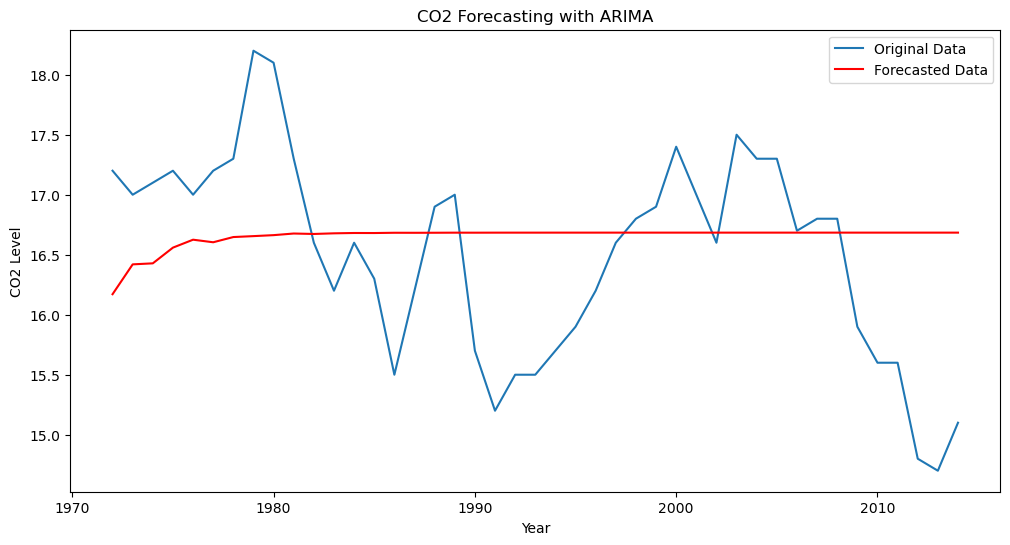

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['CO2'][:train_size], df['CO2'][train_size:]

# Define the ARIMA model
model = ARIMA(train, order=(5,1,0)) # You may need to adjust the order parameter based on your data
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Evaluate the forecast
mse = mean_squared_error(test, forecast)
print('Mean Squared Error:', mse)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Year'][-len(test):], test, label='Original Data')
plt.plot(df['Year'][-len(test):], forecast, color='red', label='Forecasted Data')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('CO2 Forecasting with ARIMA')
plt.legend()
plt.show()
